<h2>Titanic Survival prediction</h2>


In [151]:
import pandas as pd
import numpy as np

<h3>Import Data</h3>

Importing the input as a dataframe 

In [152]:
traindf = pd.read_csv("train.csv")
testdf = pd.read_csv("test.csv")

In [153]:
traindf.isnull().sum()
print("Train Shape:",traindf.shape)
testdf.isnull().sum()
print("Test Shape:",testdf.shape)

Train Shape: (891, 12)
Test Shape: (418, 11)


In [154]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


<h2>Data Dictionary</h2>
<ul>
<li>Survived: 0 = No, 1 = Yes</li>
<li>pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd</li>
<li>sibsp: No of siblings / spouses aboard the Titanic</li>
<li>parch: No of parents / children aboard the Titanic</li>
<li>ticket: Ticket number</li>
<li>cabin: Cabin number</li>
<li>embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton</li>
</ul>
<h3>Total rows and columns</h3>

We can see that there are 891 rows and 12 columns in our training dataset.

In [155]:
traindf.head(10)         #Displays the first 10 values of the data frame

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [156]:
traindf.describe()        #Describes the training data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [157]:
testdf.describe()           #Describes the testing data

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [158]:
traindf.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [159]:
testdf.isnull().sum()
testdf["Survived"] = ""
testdf.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,


# Data Visualization 

In [160]:
import matplotlib.pyplot as plt # Plot the graphes
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

## Bar graph

Visualizing data using bar graph to identify the categories of survivours
<ul>
    <li>Sex</li>
    <li>Pclass</li>
    <li>Age</li>
    <li>SibSp</li>
    <li>Parch</li>
    <li>Embarked</li>
</ul>

In [161]:
def bar_chart(feature):
    survived = traindf[traindf['Survived']==1][feature].value_counts()
    dead = traindf[traindf['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(5,5))

Survived :
 female    233
male      109
Name: Sex, dtype: int64
Dead:
 male      468
female     81
Name: Sex, dtype: int64


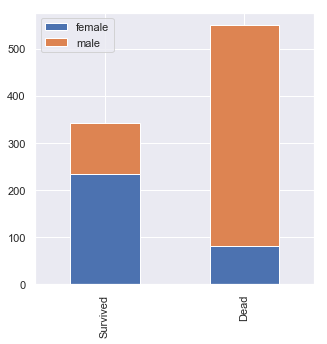

In [162]:
bar_chart('Sex')
print("Survived :\n",traindf[traindf['Survived']==1]['Sex'].value_counts())
print("Dead:\n",traindf[traindf['Survived']==0]['Sex'].value_counts())

The Above graph shows that Women are survived in more number

Survived :
 1    136
3    119
2     87
Name: Pclass, dtype: int64
Dead:
 3    372
2     97
1     80
Name: Pclass, dtype: int64


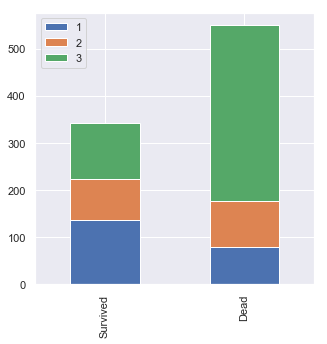

In [163]:
bar_chart('Pclass')
print("Survived :\n",traindf[train['Survived']==1]['Pclass'].value_counts())
print("Dead:\n",traindf[traindf['Survived']==0]['Pclass'].value_counts())

The Above graph confirms that 1st Class People are more likely Survived and 3rd Class are more likely Dead

Survived :
 0    210
1    112
2     13
3      4
4      3
Name: SibSp, dtype: int64
Dead:
 0    398
1     97
4     15
2     15
3     12
8      7
5      5
Name: SibSp, dtype: int64


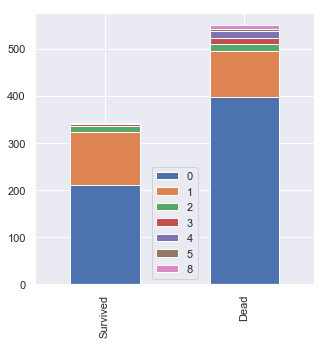

In [164]:
bar_chart('SibSp')
print("Survived :\n",traindf[traindf['Survived']==1]['SibSp'].value_counts())
print("Dead:\n",traindf[traindf['Survived']==0]['SibSp'].value_counts())

The Graph shows that person with more than 1 sibling more likely survived
<li>Person with no sibling is more likely dead</li>

Survived :
 0    233
1     65
2     40
3      3
5      1
Name: Parch, dtype: int64
Dead:
 0    445
1     53
2     40
5      4
4      4
3      2
6      1
Name: Parch, dtype: int64


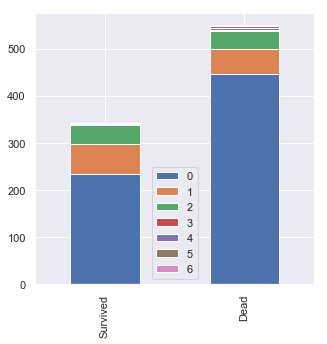

In [165]:
bar_chart('Parch')
print("Survived :\n",traindf[traindf['Survived']==1]['Parch'].value_counts())
print("Dead:\n",traindf[traindf['Survived']==0]['Parch'].value_counts())

The Above graph shows that the person aborded with more than 2 parents or children has survived more
<li>The graph shows that person aborded alone has more likely dead</li>

Survived :
 S    217
C     93
Q     30
Name: Embarked, dtype: int64
Dead:
 S    427
C     75
Q     47
Name: Embarked, dtype: int64


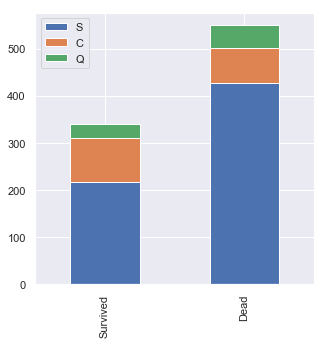

In [166]:
bar_chart('Embarked')
print("Survived :\n",traindf[traindf['Survived']==1]['Embarked'].value_counts())
print("Dead:\n",traindf[traindf['Survived']==0]['Embarked'].value_counts())

The Graph show that person embarked at C (Cherbourg) has more likely survived

## Validation

In [167]:
traindf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [168]:
traindf.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [169]:
train_test_data = [traindf,testdf]     # combine dataset

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [170]:
traindf['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Don           1
Jonkheer      1
Sir           1
Ms            1
Capt          1
Mme           1
Lady          1
Countess      1
Name: Title, dtype: int64

### Map title with values 
<li></li>
<li>Mr: 0</li>
<li>Miss: 1</li>
<li>Mrs: 2</li>
<li>Others: 3</li>

In [171]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }

for dataset in train_test_data:
    dataset['Title'] = dataset["Title"].map(title_mapping)

In [172]:
dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,,2


In [173]:
testdf.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,,2


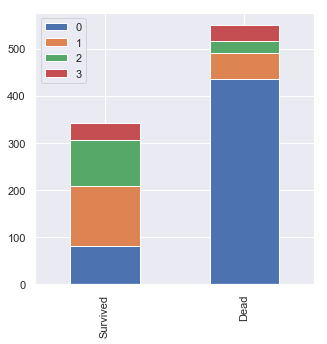

In [174]:
bar_chart('Title')

In [175]:
# delete unnecessary feature from dataset
traindf.drop('Name', axis=1, inplace=True)
testdf.drop('Name', axis=1, inplace=True)

In [176]:
traindf.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [177]:
sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

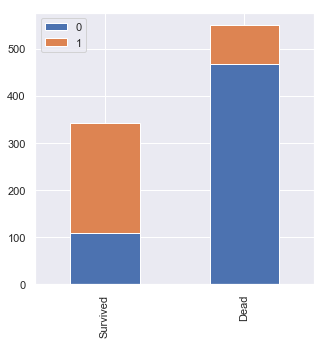

In [178]:
bar_chart('Sex')

In [179]:
testdf.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title
0,892,3,0,34.5,0,0,330911,7.8292,NaN,Q,,0
1,893,3,1,47.0,1,0,363272,7.0000,NaN,S,,2
2,894,2,0,62.0,0,0,240276,9.6875,NaN,Q,,0
3,895,3,0,27.0,0,0,315154,8.6625,NaN,S,,0
4,896,3,1,22.0,1,1,3101298,12.2875,NaN,S,,2


In [180]:
traindf["Age"].fillna(traindf.groupby("Title")["Age"].transform("median"), inplace= True)
testdf["Age"].fillna(testdf.groupby('Title')['Age'].transform("median"), inplace= True)

In [181]:
traindf.head(30)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,30.0,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,0,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,0,2.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,1,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,1,14.0,1,0,237736,30.0708,NaN,C,2


## Plotting a graph for Age 

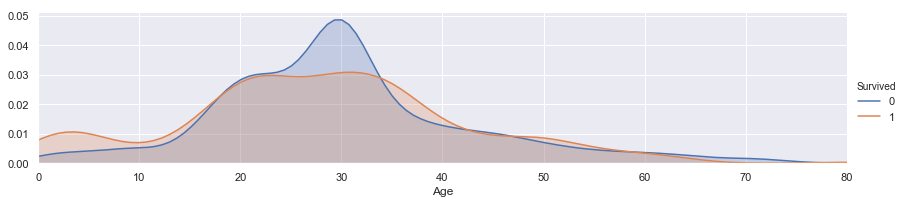

(10, 50)

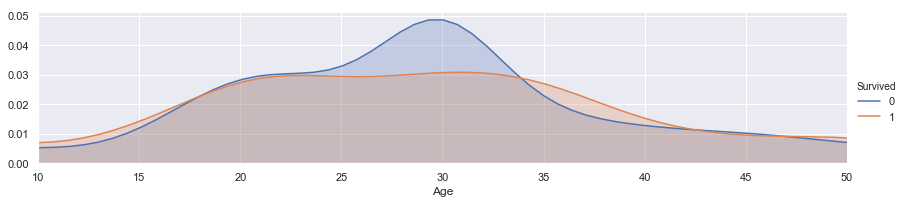

In [182]:
facet = sns.FacetGrid(traindf, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, traindf['Age'].max()))
facet.add_legend() 
plt.show()

facet = sns.FacetGrid(traindf, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, traindf['Age'].max()))
facet.add_legend() 
plt.xlim(10,50)

The above graph shows that people with age of 20-30 are more likely dead and survived

In [183]:
traindf.info()
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Title          891 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 83.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
E

## Converting numerical age to a value 
<li></li>
<li><h4>Map</h4></li>
<li></li>
<li>Child: 0</li>
<li>Young: 1</li>
<li>Adult: 2</li>
<li>Mid-Age: 3</li>
<li>Seniors: 4</li>

In [184]:
traindf.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


In [185]:
for dataset in train_test_data:        #Categorizing Age Data
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

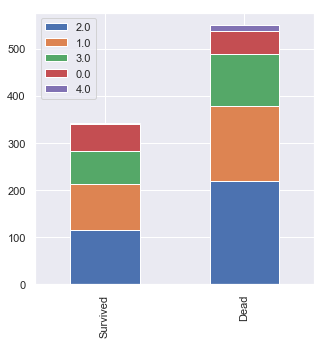

In [186]:
traindf.head()
bar_chart('Age')

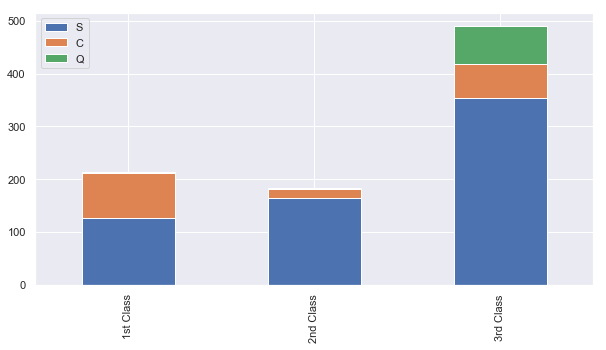

Pclass1:
 S    127
C     85
Q      2
Name: Embarked, dtype: int64
Pclass2:
 S    164
C     17
Q      3
Name: Embarked, dtype: int64
Pclass3:
 S    353
Q     72
C     66
Name: Embarked, dtype: int64


In [187]:
Pclass1 = traindf[traindf['Pclass'] == 1]['Embarked'].value_counts()
Pclass2 = traindf[traindf['Pclass'] == 2]['Embarked'].value_counts()
Pclass3 = traindf[traindf['Pclass'] == 3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index = ['1st Class','2nd Class','3rd Class']
df.plot(kind = 'bar', stacked =  True, figsize=(10,5))
plt.show()
print("Pclass1:\n",Pclass1)
print("Pclass2:\n",Pclass2)
print("Pclass3:\n",Pclass3)

More than 50% of all the 3 classes are from 'S' embark
<li></li>
<h4>Fill out the missing embark with S</h4>

In [188]:
for dataset in train_test_data:
    dataset['Embarked'] =  dataset['Embarked'].fillna('S')

In [189]:
traindf.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


In [190]:
embarked_mapping = {'S':0,'C':1,'Q':2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [191]:
traindf["Fare"].fillna(traindf.groupby("Pclass")["Fare"].transform("median"), inplace=True)
testdf["Fare"].fillna(testdf.groupby("Pclass")["Fare"].transform("median"), inplace=True)
traindf.head(50)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0
5,6,0,3,0,2.0,0,0,330877,8.4583,NaN,2,0
6,7,0,1,0,3.0,0,0,17463,51.8625,E46,0,0
7,8,0,3,0,0.0,3,1,349909,21.0750,NaN,0,3
8,9,1,3,1,2.0,0,2,347742,11.1333,NaN,0,2
9,10,1,2,1,0.0,1,0,237736,30.0708,NaN,1,2


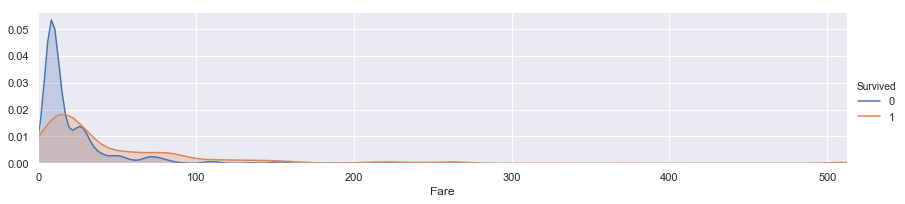

In [192]:
facet = sns.FacetGrid(traindf, hue="Survived",aspect=4 )
facet.map(sns.kdeplot, 'Fare', shade = True)
facet.set(xlim = (0, traindf['Fare'].max()))
facet.add_legend()
plt.show()

(0, 20)

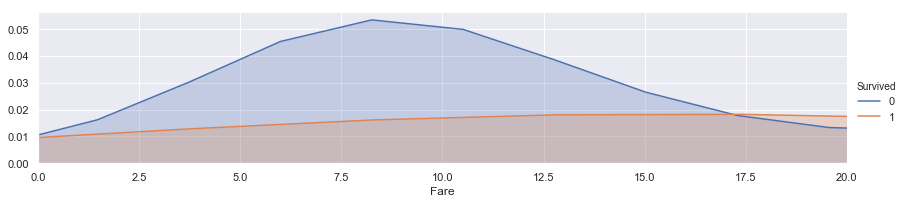

In [193]:
facet = sns.FacetGrid(traindf, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, traindf['Fare'].max()))
facet.add_legend()
plt.xlim(0, 20)

### Combining numerical fare values to data
<li>
    <li>Fare less than 18: 0</li>
    <li>Fare between 17 and 31: 1</li>
    <li>Fare between 31 and 100: 2</li>
    <li>Fare above 100: 3</li>
</li>

In [194]:
for dataset in train_test_data:
    dataset.loc[dataset['Fare'] <= 17, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[dataset['Fare'] >= 100, 'Fare'] = 3

In [195]:
traindf.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


In [196]:
traindf.Cabin.value_counts()        #counting the values based on fare

B96 B98            4
G6                 4
C23 C25 C27        4
E101               3
F2                 3
F33                3
D                  3
C22 C26            3
C52                2
C125               2
E44                2
C68                2
B57 B59 B63 B66    2
C83                2
D35                2
C78                2
F G73              2
E25                2
C123               2
C65                2
E67                2
D26                2
B5                 2
D17                2
E8                 2
E33                2
B49                2
E121               2
D20                2
B18                2
                  ..
B80                1
C95                1
D37                1
E50                1
A20                1
B82 B84            1
A16                1
A36                1
C111               1
B42                1
E17                1
E49                1
A32                1
C90                1
A19                1
C148               1
C104         

In [197]:
for dataset in train_test_data:
    dataset['Cabin'] =  dataset['Cabin'].str[:1]

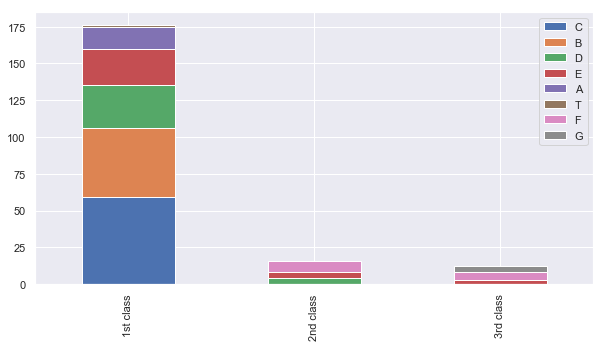

In [198]:
Pclass1 = traindf[traindf['Pclass']==1]['Cabin'].value_counts()
Pclass2 = traindf[traindf['Pclass']==2]['Cabin'].value_counts()
Pclass3 = traindf[traindf['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [199]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [200]:
# fill missing Fare with median fare for each Pclass
traindf["Cabin"].fillna(traindf.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
testdf["Cabin"].fillna(testdf.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

### Family Size

In [201]:
traindf["FamilySize"] = traindf["SibSp"] + traindf["Parch"] + 1
testdf["FamilySize"] = testdf["SibSp"] + testdf["Parch"] + 1

(0, 11.0)

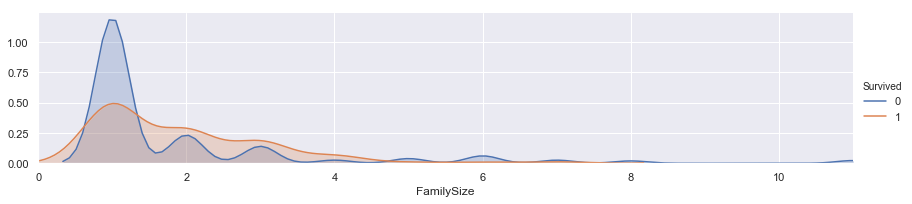

In [202]:
facet = sns.FacetGrid(traindf, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, traindf['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [203]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [204]:
traindf.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,0.0


In [205]:
testdf.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title,FamilySize
0,892,3,0,2.0,0,0,330911,0.0,2.0,2,,0,0.0
1,893,3,1,3.0,1,0,363272,0.0,2.0,0,,2,0.4
2,894,2,0,3.0,0,0,240276,0.0,2.0,2,,0,0.0
3,895,3,0,2.0,0,0,315154,0.0,2.0,0,,0,0.0
4,896,3,1,1.0,1,1,3101298,0.0,2.0,0,,2,0.8


In [206]:
features_drop = ['Ticket','SibSp','Parch']
traindf = traindf.drop(features_drop, axis = 1)
testdf = testdf.drop(features_drop,axis=1)
traindf = traindf.drop(['PassengerId'], axis=1)

In [207]:
train_data = traindf.drop('Survived', axis = 1)
target = traindf['Survived']
train_data.shape, target.shape

((891, 8), (891,))

In [208]:
train_data.head(10)

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,2.0,2.0,0.8,0,2,0.4
4,3,0,2.0,0.0,2.0,0,0,0.0
5,3,0,2.0,0.0,2.0,2,0,0.0
6,1,0,3.0,2.0,1.6,0,0,0.0
7,3,0,0.0,1.0,2.0,0,3,1.6
8,3,1,2.0,0.0,2.0,0,2,0.8
9,2,1,0.0,2.0,1.8,1,2,0.4


## Modelling 

In [209]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [210]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null float64
Fare          891 non-null float64
Cabin         891 non-null float64
Embarked      891 non-null int64
Title         891 non-null int64
FamilySize    891 non-null float64
dtypes: float64(4), int64(5)
memory usage: 62.7 KB


## Validations using K-fold 

In [211]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [212]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.82222222 0.76404494 0.80898876 0.83146067 0.87640449 0.82022472
 0.85393258 0.79775281 0.84269663 0.84269663]


In [213]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)


clf = [KNeighborsClassifier(n_neighbors = 13),DecisionTreeClassifier(),
       RandomForestClassifier(n_estimators=13),GaussianNB(),SVC(),ExtraTreeClassifier(),
      GradientBoostingClassifier(n_estimators=10, learning_rate=1,max_features=3, max_depth =3, random_state = 10),AdaBoostClassifier(),ExtraTreesClassifier()]
def model_fit():
    scoring = 'accuracy'
    for i in range(len(clf)):
        score = cross_val_score(clf[i], train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
        print("Score of Model",i,":",round(np.mean(score)*100,2))
#     round(np.mean(score)*100,2)
#     print("Score of :\n",score)
model_fit()

Score of Model 0 : 82.6
Score of Model 1 : 80.03
Score of Model 2 : 80.7
Score of Model 3 : 78.78
Score of Model 4 : 83.5
Score of Model 5 : 79.01
Score of Model 6 : 81.25
Score of Model 7 : 81.03
Score of Model 8 : 80.25


This shows the accuracy score of each model

In [214]:
clf1 = SVC()
clf1.fit(train_data, target)
testdf
test_data = testdf.drop(['Survived','PassengerId'], axis=1)
prediction = clf1.predict(test_data)      #prediction of test data

In [215]:
test_data['Survived'] = prediction
submission = pd.DataFrame(testdf['PassengerId'],test_data['Survived'])
submission.to_csv("Submission.csv")